In [ ]:


# System imports
import sys
import os

# Add the parent directory of 'notebooks' to sys.path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Move one level up
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Class/model imports
from data.data_loader import MirDataProcessor
from utils.model_utils import get_device
from solver import Solver

# Package imports
import torch
import torch.optim as optim
import torch.nn as nn

# Select device
device = get_device()
print(f"Device is {device}")

Device is cuda


In [25]:
# Download and build useable train/test data out of the MIR Billboard dataset
data_processer = MirDataProcessor(download=True, batch_size=64, dataset_name="guitarset")


INFO: Downloading ['annotations', 'audio_hex_debleeded', 'audio_hex_original', 'audio_mic', 'audio_mix', 'index']. Index is being stored in C:\Users\mattb\miniconda3\envs\amadeus-ex-machina\Lib\site-packages\mirdata\datasets\indexes, and the rest of files in c:\Users\mattb\Documents\CS7643\Final Project\amadeus-ex-machina\data\raw
INFO: [annotations] downloading annotation.zip
37.3MB [00:02, 14.5MB/s]                              
INFO: [audio_hex_debleeded] downloading audio_hex-pickup_debleeded.zip
3.36GB [02:29, 24.1MB/s]                               
INFO: [audio_hex_original] downloading audio_hex-pickup_original.zip
2.99GB [01:57, 27.2MB/s]                               
INFO: [audio_mic] downloading audio_mono-mic.zip
626MB [00:25, 25.8MB/s]                               
INFO: [audio_mix] downloading audio_mono-pickup_mix.zip
652MB [00:33, 20.4MB/s]                               
INFO: [index] downloading guitarset_index_1.1.0.json
248kB [00:00, 372kB/s]                       

In [ ]:
%load_ext autoreload

%autoreload 2

from data.data_loader import MirDataProcessor
data_processer = MirDataProcessor(download=False, batch_size=256, dataset_name="guitarset", process_sequential=True, seq_length=16384)

data_processer.process_wav_data(100)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Found 360 tracks in the dataset.
Processing dataset as sequential data
Processed track 00_BN1-129-Eb_comp and appended data to combined CSV.
Processing dataset as sequential data
Processed track 00_BN1-129-Eb_solo and appended data to combined CSV.
Processing dataset as sequential data
Processed track 00_BN1-147-Gb_comp and appended data to combined CSV.
Processing dataset as sequential data
Processed track 00_BN1-147-Gb_solo and appended data to combined CSV.
Processing dataset as sequential data
Processed track 00_BN2-131-B_comp and appended data to combined CSV.
Processing dataset as sequential data
Processed track 00_BN2-131-B_solo and appended data to combined CSV.
Processing dataset as sequential data
Processed track 00_BN2-166-Ab_comp and appended data to combined CSV.
Processing dataset as sequential data
Processed track 00_BN2-166-Ab_solo and appended data to combined CSV.
Processing datase

In [ ]:
# Create data loeaders for train and test set
train_loader, test_loader, num_classes = data_processer.build_data_loaders(None, device)

print(f"Number of classes: {num_classes}")

Preparing model data...
Loading the combined CSV file...


-----------------------------------
Epoch 1
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 3.1278. Validation Loss: 4.9036.
Training Accuracy: 0.1070. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 2
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 2.9293. Validation Loss: 5.6999.
Training Accuracy: 0.1441. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 3
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 2.8634. Validation Loss: 5.7862.
Training Accuracy: 0.1719. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 4
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 2.8075. Validation Loss: 5.7545.
Training Accuracy: 0.1904. Validation Accuracy: 0.0168.
-----------------------------------
Epoch 5
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 2.7496. Validation Loss: 5.9402.
Training Accuracy: 0.2098. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 6
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 2.7230. Validation Loss: 6.1228.
Training Accuracy: 0.2081. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 7
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 2.6743. Validation Loss: 6.3005.
Training Accuracy: 0.2233. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 8
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 2.6355. Validation Loss: 6.2533.
Training Accuracy: 0.2393. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 9
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 2.5961. Validation Loss: 6.5669.
Training Accuracy: 0.2426. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 10
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 2.5569. Validation Loss: 6.5236.
Training Accuracy: 0.2527. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 11
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 2.5089. Validation Loss: 6.6504.
Training Accuracy: 0.2915. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 12
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 2.5001. Validation Loss: 6.7712.
Training Accuracy: 0.2797. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 13
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 2.4609. Validation Loss: 6.9991.
Training Accuracy: 0.2940. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 14
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 2.3899. Validation Loss: 6.8885.
Training Accuracy: 0.3286. Validation Accuracy: 0.0034.
-----------------------------------
Epoch 15
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 2.3819. Validation Loss: 7.0480.
Training Accuracy: 0.3193. Validation Accuracy: 0.0101.
-----------------------------------
Epoch 16
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 2.3712. Validation Loss: 6.9920.
Training Accuracy: 0.3454. Validation Accuracy: 0.0034.
-----------------------------------
Epoch 17
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 2.3612. Validation Loss: 7.2087.
Training Accuracy: 0.3311. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 18
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 2.3516. Validation Loss: 7.1091.
Training Accuracy: 0.3227. Validation Accuracy: 0.0067.
-----------------------------------
Epoch 19
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 2.2683. Validation Loss: 7.2026.
Training Accuracy: 0.3698. Validation Accuracy: 0.0303.
-----------------------------------
Epoch 20
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 2.2791. Validation Loss: 7.2178.
Training Accuracy: 0.3682. Validation Accuracy: 0.0067.
-----------------------------------
Epoch 21
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 2.2192. Validation Loss: 7.1097.
Training Accuracy: 0.3825. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 22
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 2.2406. Validation Loss: 7.2496.
Training Accuracy: 0.4010. Validation Accuracy: 0.0034.
-----------------------------------
Epoch 23
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 2.2137. Validation Loss: 7.1485.
Training Accuracy: 0.3842. Validation Accuracy: 0.0168.
-----------------------------------
Epoch 24
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 2.1255. Validation Loss: 7.1393.
Training Accuracy: 0.4052. Validation Accuracy: 0.0034.
-----------------------------------
Epoch 25
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 2.0980. Validation Loss: 7.2572.
Training Accuracy: 0.4170. Validation Accuracy: 0.0067.
-----------------------------------
Epoch 26
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 2.0749. Validation Loss: 7.4115.
Training Accuracy: 0.4297. Validation Accuracy: 0.0101.
-----------------------------------
Epoch 27
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 2.0753. Validation Loss: 7.5201.
Training Accuracy: 0.4288. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 28
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 2.0024. Validation Loss: 7.3520.
Training Accuracy: 0.4566. Validation Accuracy: 0.0101.
-----------------------------------
Epoch 29
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 2.0016. Validation Loss: 7.3981.
Training Accuracy: 0.4414. Validation Accuracy: 0.0303.
-----------------------------------
Epoch 30
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 2.0075. Validation Loss: 7.3505.
Training Accuracy: 0.4356. Validation Accuracy: 0.0135.
-----------------------------------
Epoch 31
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 1.9904. Validation Loss: 7.4583.
Training Accuracy: 0.4667. Validation Accuracy: 0.0135.
-----------------------------------
Epoch 32
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 1.9074. Validation Loss: 7.4410.
Training Accuracy: 0.4760. Validation Accuracy: 0.0034.
-----------------------------------
Epoch 33
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 1.9023. Validation Loss: 7.6164.
Training Accuracy: 0.4987. Validation Accuracy: 0.0438.
-----------------------------------
Epoch 34
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 1.9036. Validation Loss: 7.5602.
Training Accuracy: 0.4844. Validation Accuracy: 0.0067.
-----------------------------------
Epoch 35
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 1.8917. Validation Loss: 7.5810.
Training Accuracy: 0.5114. Validation Accuracy: 0.0067.
-----------------------------------
Epoch 36
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 1.8336. Validation Loss: 7.6313.
Training Accuracy: 0.5333. Validation Accuracy: 0.0067.
-----------------------------------
Epoch 37
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 1.8122. Validation Loss: 7.5918.
Training Accuracy: 0.5232. Validation Accuracy: 0.0034.
-----------------------------------
Epoch 38
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 1.7481. Validation Loss: 7.9306.
Training Accuracy: 0.5527. Validation Accuracy: 0.0067.
-----------------------------------
Epoch 39
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 1.7319. Validation Loss: 7.8400.
Training Accuracy: 0.5434. Validation Accuracy: 0.0000.
-----------------------------------
Epoch 40
-----------------------------------


Training:   0%|          | 0/19 [00:00<?, ?it/s]

Training Loss: 1.7155. Validation Loss: 7.9106.
Training Accuracy: 0.5409. Validation Accuracy: 0.0101.


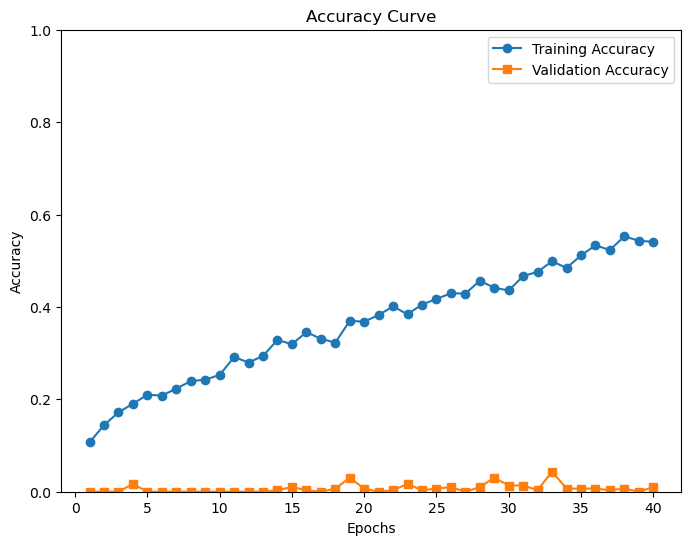

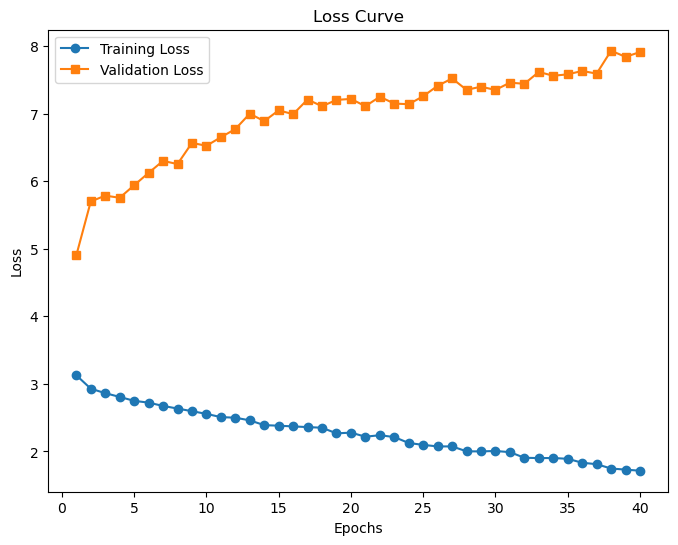

In [96]:
from models.FourierS2S import FourierS2S

model = FourierS2S(8192, 8192, 8192, 1024, 1024, num_classes, 16384, device)

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.StepLR(optimizer, 10)


# Initialize Solver for CRNNModel
fourierS2S_solver = Solver(
    model=model,
    optimizer=optimizer,
    criterion=criterion,
    scheduler=scheduler,
    train_dataloader=train_loader,
    valid_dataloader=test_loader,
    batch_size=64,
    epochs=40,
    device=device,
    early_stop_epochs=0,
    warmup_epochs=2,
    optuna_prune=False
)
fourierS2S_solver.train_and_evaluate(plot_results=True)